# Data Processing

## Import necessary libraries

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Read in mobile_data.csv file

In [30]:
df = pd.read_csv("data/mobile_data.csv")
y = df['price_range']
x = df.drop('price_range', axis=1)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Check for Null Values


In [31]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Use seaborn heatmap chart to visualize the correlations between the columns.


<Axes: >

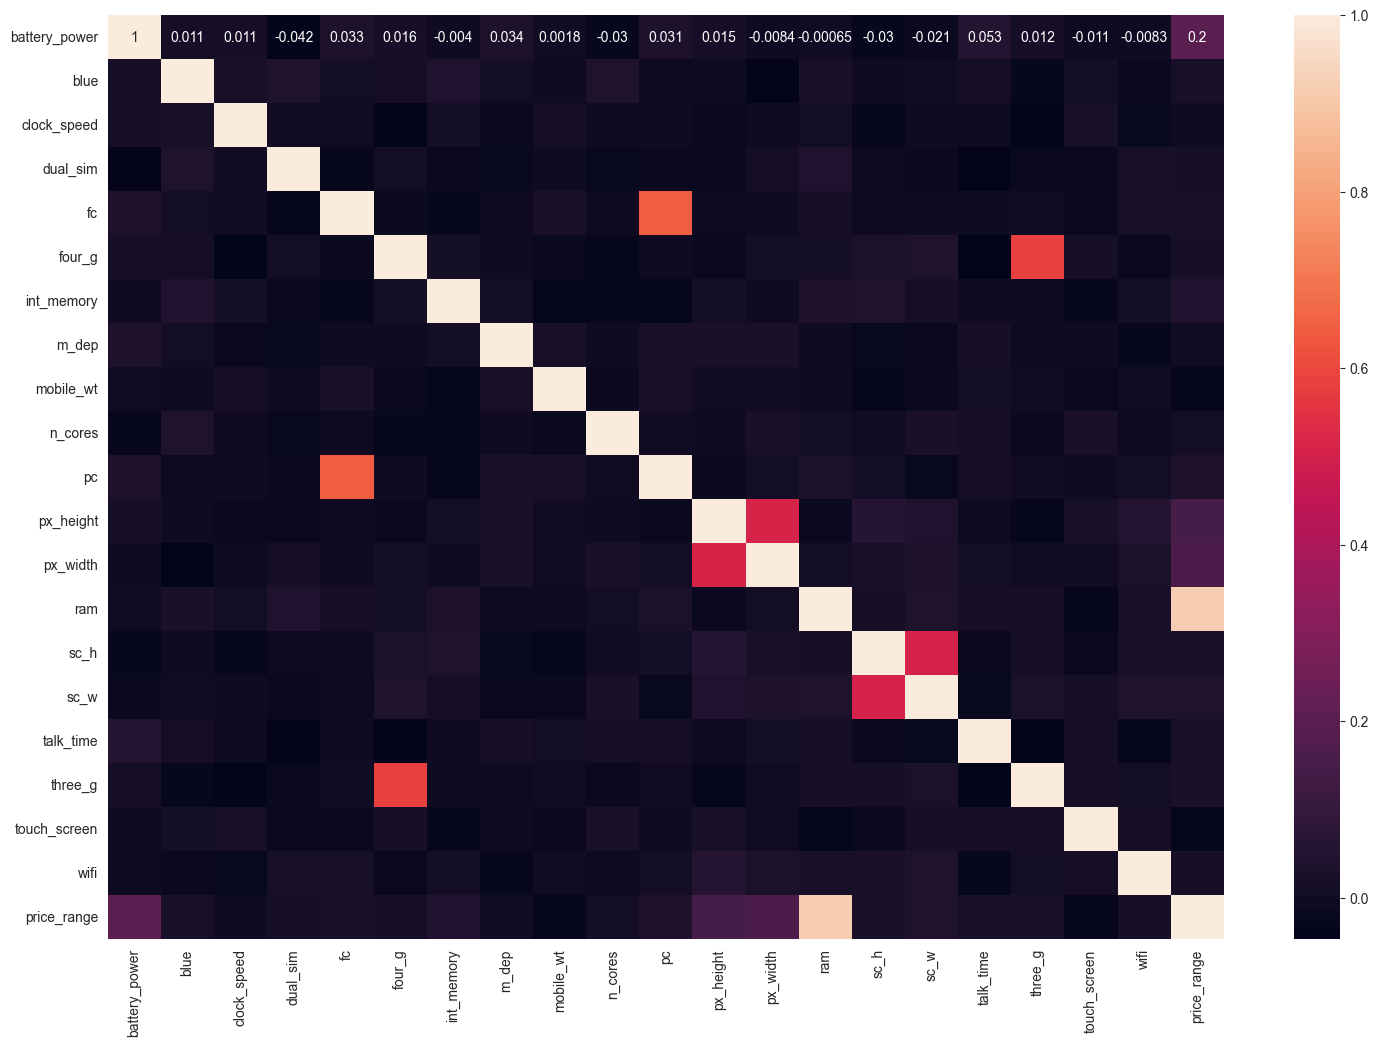

In [32]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True)

# List columns that correlate the most with the 'price_range' column.

In [33]:
correlated_price_range = corr_matrix['price_range'].drop('price_range').abs()
correlations = correlated_price_range[correlated_price_range >= 0.1]
print(correlations)

battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
Name: price_range, dtype: float64


# Update the 'x' dataframe with selected features/columns for 'price_range'.


In [34]:
# A3 Part 3:
x = df[correlations.index]

# Plot the distribution for the price_range column

<Axes: xlabel='price_range', ylabel='Count'>

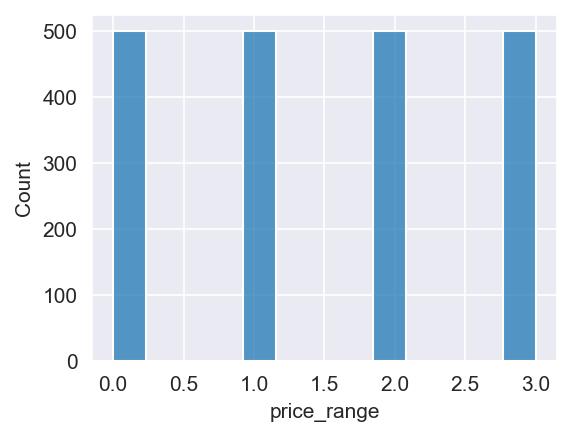

In [35]:
plt.figure(figsize=(4,3),dpi=150)
sns.histplot(df['price_range'])

# histogram relationship between _price_range_ and the _ram_ of a mobile

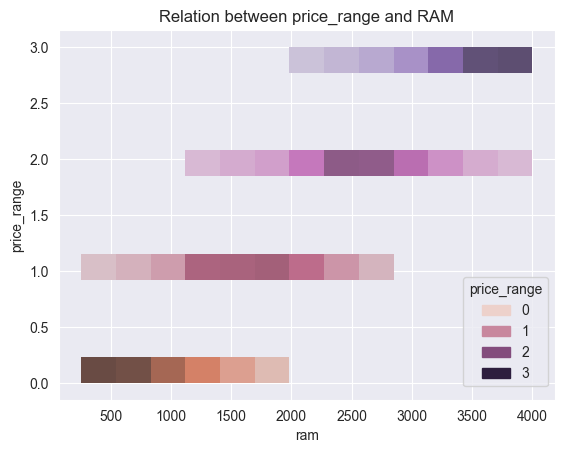

In [36]:
sns.histplot(data=df, x='ram', y='price_range', hue='price_range')

# I had to look this function call up on google to place the legend in the bottom right corner
legend = plt.gca().legend_
legend.set_bbox_to_anchor((1, 0.35))
plt.title("Relation between price_range and RAM")
plt.show()

# Scale and split data
* StandardScaler from sklearn to transform the x dataframe.
* Split dataset into train and test data use train_test_split with test_size = 0.2 and random_state = 42
* Check the number of instance in the train and test set.
* Check the number of instance per class in train and test set using ytrain and ytest

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [39]:
print('Number of instances in: ')
print('X Train:', x_train.shape[0])
print('X Test:', x_test.shape[0])
print("\nNumber of instances per class")
print("y_train:")
print(y_train.value_counts())
print("y_test:")
print(y_test.value_counts())

Number of instances in: 
X Train: 1600
X Test: 400

Number of instances per class
y_train:
price_range
1    409
2    408
0    395
3    388
Name: count, dtype: int64
y_test:
price_range
3    112
0    105
2     92
1     91
Name: count, dtype: int64


# Classification Model 1: Logistic Regression

Here I'm fitting Logistic Regression model to the train dataset using K-fold cross validation

**process for fitting the model**
* Create a logistic regression model using sklearn
* Fit the mmodel with the training data
* Get the score from the model using test data
* Plot a confusion matrix

In [40]:
import matplotlib.pyplot as plt

# Create a logistic regression model using sklearn library
clf= LogisticRegression()
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(score)

0.9725


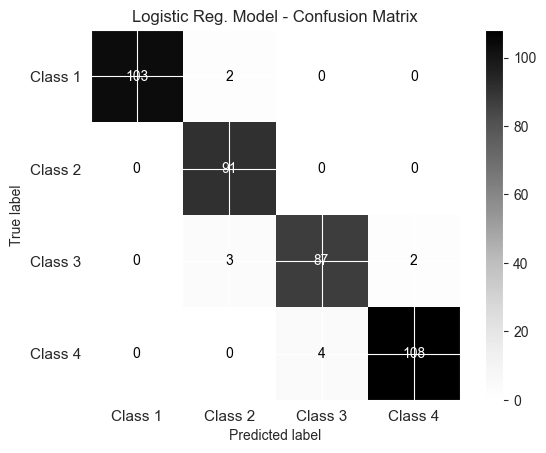

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')  # You can change the colormap here

plt.title("Logistic Reg. Model - Confusion Matrix")
plt.xticks(range(4), ["Class 1", "Class 2", "Class 3", "Class 4"],fontsize=11)
plt.yticks(range(4), ["Class 1", "Class 2", "Class 3", "Class 4"],fontsize=11)
plt.show()

# Train Logistic Regression Model using cross-validation on _xtrain, ytrain_ data.
* Apply K fold cross validation technique for the model training (cross_val_score), and set K to 5 or 10. 
* Print the different scores from different folds

In [42]:
from sklearn.model_selection import cross_val_score

# Use sklearn for 5 fold cross validation 
scores_log= cross_val_score(clf, x_train, y_train, cv=5)

# print the scores from different folds
print(scores_log)

[0.95625  0.953125 0.959375 0.95625  0.953125]


# Classification Model 2: K Nearest Neighbor Classifier

Here, we will fit KNN on the train dataset using k-fold cross validation, and evaluate its classification accuracy on the train dataset using confusion matrix.

**Process for fitting KNN**
* Create KNN model using sklearn
* Fit the model
* Predict the values from the test data
* Print the score from training and test data
* Repeat these steps for a range of ```n-_neighbors``` values (k in KNN) from 1 to 30

In [43]:
from sklearn.neighbors import KNeighborsClassifier


# Define KNN model
for k in range(1,31):

    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit KNN model on xtrain, ytrain from above
    knn.fit(x_train, y_train)
    #predict y values from xtest
    y_pred=knn.predict(x_test)

    #print score for test data
    print("K: ",k,"Train Score: ",knn.score(x_train, y_train), "Test Score: ",knn.score(x_test, y_test))

K:  1 Train Score:  1.0 Test Score:  0.8875
K:  2 Train Score:  0.933125 Test Score:  0.8675
K:  3 Train Score:  0.955 Test Score:  0.915
K:  4 Train Score:  0.92625 Test Score:  0.895
K:  5 Train Score:  0.930625 Test Score:  0.915
K:  6 Train Score:  0.92 Test Score:  0.91
K:  7 Train Score:  0.924375 Test Score:  0.91
K:  8 Train Score:  0.91875 Test Score:  0.9175
K:  9 Train Score:  0.92625 Test Score:  0.9225
K:  10 Train Score:  0.91875 Test Score:  0.9175
K:  11 Train Score:  0.9225 Test Score:  0.925
K:  12 Train Score:  0.92 Test Score:  0.9225
K:  13 Train Score:  0.924375 Test Score:  0.93
K:  14 Train Score:  0.92 Test Score:  0.91
K:  15 Train Score:  0.923125 Test Score:  0.915
K:  16 Train Score:  0.921875 Test Score:  0.915
K:  17 Train Score:  0.9225 Test Score:  0.915
K:  18 Train Score:  0.92 Test Score:  0.9025
K:  19 Train Score:  0.919375 Test Score:  0.9125
K:  20 Train Score:  0.9175 Test Score:  0.905
K:  21 Train Score:  0.91875 Test Score:  0.9
K:  22 Train 

# create a KNN Classifier using best value of K found previously

* Train the model using xtrain, ytrain values.
* Plot confusion matrix for the xtest and ytest

In [44]:
#assign value from previous question
k_best = 9
knn_best = KNeighborsClassifier(n_neighbors=k_best)

knn_best.fit(x_train, y_train)
y_pred = knn_best.predict(x_test)


<Figure size 640x480 with 0 Axes>

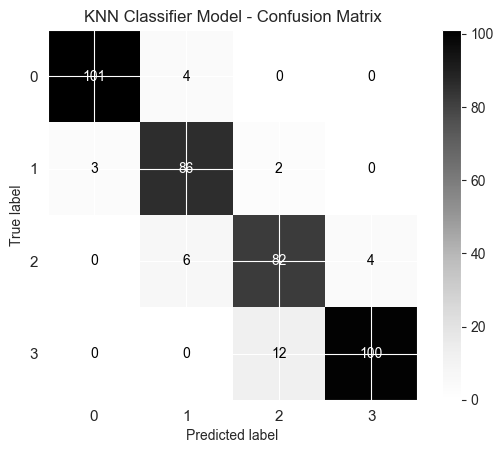

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
cmd.plot(cmap='Greys')

plt.title("KNN Classifier Model - Confusion Matrix")
plt.xticks(fontsize=11)  # You can also provide label values and rotation angle if needed
plt.yticks(fontsize=11)
plt.show()

# Train KNN classifier using cross-validation approach

**Note:**

I used a range of ```n_neighbors``` values (k in kNN) from 1 to 30.


In [49]:
# Define KNN model
from sklearn.model_selection import cross_val_score

for k in range(1,31):
    #Define KNN model
    knn_crossval = KNeighborsClassifier(n_neighbors=k)

    # Use sklearn for 5 fold cross validation
    scores_cv= cross_val_score(knn_crossval, x_train, y_train, cv=5)

    # print the scores from different folds
    print("K:", k, "Cross-Validation Score:", scores_cv.mean())

K: 1 Cross-Validation Score: 0.8525
K: 2 Cross-Validation Score: 0.8474999999999999
K: 3 Cross-Validation Score: 0.8625
K: 4 Cross-Validation Score: 0.858125
K: 5 Cross-Validation Score: 0.868125
K: 6 Cross-Validation Score: 0.8706249999999999
K: 7 Cross-Validation Score: 0.8731249999999999
K: 8 Cross-Validation Score: 0.8731249999999999
K: 9 Cross-Validation Score: 0.8775000000000001
K: 10 Cross-Validation Score: 0.8793750000000001
K: 11 Cross-Validation Score: 0.885
K: 12 Cross-Validation Score: 0.8818750000000002
K: 13 Cross-Validation Score: 0.8875
K: 14 Cross-Validation Score: 0.8818750000000002
K: 15 Cross-Validation Score: 0.8881250000000002
K: 16 Cross-Validation Score: 0.88375
K: 17 Cross-Validation Score: 0.8925000000000001
K: 18 Cross-Validation Score: 0.8893749999999999
K: 19 Cross-Validation Score: 0.890625
K: 20 Cross-Validation Score: 0.8862500000000001
K: 21 Cross-Validation Score: 0.8943749999999999
K: 22 Cross-Validation Score: 0.8881249999999999
K: 23 Cross-Validatio

# Comparison of Models

(400,) (400,) (400,)


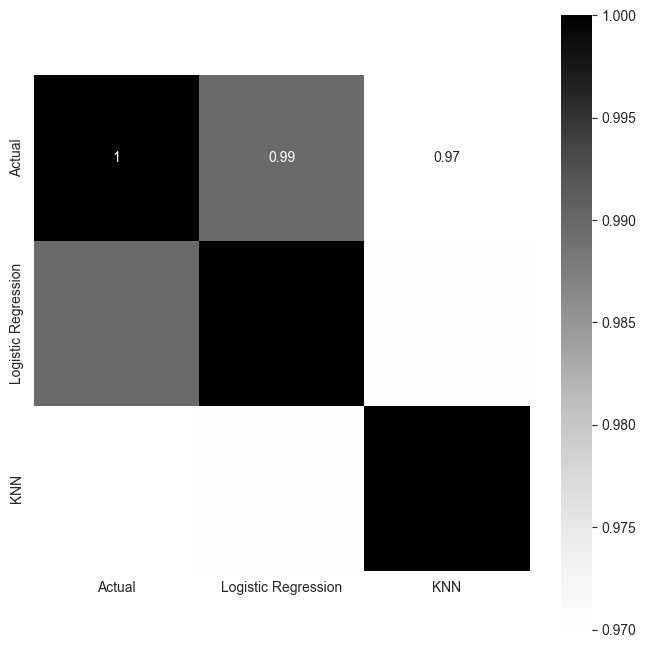

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
#
# Predict Train dataset using logistic reg
clf= LogisticRegression()
clf.fit(x_train, y_train)
ypred_clf= clf.predict(x_test)

# Predict Train dataset using KNN
knn= KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train, y_train)
ypred_knn=knn.predict(x_test)

print(y_test.shape, ypred_clf.shape, ypred_knn.shape)
# Create a dataframe using the predicted results from the models
df = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': ypred_clf,
    'KNN': ypred_knn
})

#copute correlation 
correlation = df.corr()

# Now use seaborn library to plot the heatmap correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='Greys', square=True)
plt.show()
